In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import json
import ast
import pydeck as pdk
import ipywidgets as widgets

# import requests
# from bs4 import BeautifulSoup

In [40]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [41]:
import warnings  
warnings.filterwarnings('ignore')

In [118]:
df1 = pd.read_csv(r'.\data\PatientInfo.csv')
df2 = pd.read_csv(r'.\data\PatientRoute.csv')
time = pd.read_csv(r'.\data\Time.csv')

In [43]:
#나이와 infection case가 없으면 원하는 데이터를 애초에 못 얻기 때문에 전부 drop해준다.
# df1.dropna(subset=['age','infection_case'])

In [44]:
df1.age.isnull().sum()

479

In [45]:
df1.age = df1.age.str.replace('s','',regex=True)

In [46]:
df1.age=pd.to_numeric(df1.age)

In [47]:
for i in range(len(df1)):
    if df1.birth_year[i]==" ":
        df1.birth_year[i]=np.NaN
    else:
        df1.birth_year[i]=pd.to_numeric(df1.birth_year[i])

In [48]:
for i in range(len(df1)):
    if pd.notna(df1.birth_year[i]) and pd.isna(df1.age[i]):
        df1.age[i]=(2020-df1.birth_year[i])//10*10

In [49]:
df1.age.isnull().sum()

339

In [50]:
def convertdate(x):
    x=datetime.strptime(x, '%Y-%m-%d')
    return x

In [51]:
df2.date = df2.date.apply(lambda x : convertdate(x))

In [52]:
max(df2.date)-min(df2.date)

Timedelta('133 days 00:00:00')

In [53]:
search_word = ['우한 폐렴','우한','코로나','코로나 바이러스']
# age = ['10s','20s','30s','40s','50s']


In [54]:
# time = [str(x).zfill(2) for x in range(0,24)]

In [55]:
# for i in range(len(date)):
#     date[i]=date[i].strftime("%Y-%m-%d")

In [56]:
# search_trend_url = f'https://datalab.naver.com/keyword/realtimeList.naver?age={age}&datetime={date}T{time}%3A00%3A00&entertainment=-2&groupingLevel=0&marketing=2&news=2&sports=-2&where=main'

In [57]:
# search_trend_url = 'https://datalab.naver.com/keyword/realtimeList.naver?age=50s&datetime=2020-01-20T00%3A00%3A00&entertainment=-2&groupingLevel=0&marketing=2&news=2&sports=-2&where=main'
# main = requests.get(search_trend_url)

In [58]:
# main_list = BeautifulSoup(main.content, 'html.parser')

In [59]:
# link_list = main_list.select('.wrap>.section_keyword>.section_area>.selection_content>.filed_list>.ranking_box>.list_group')
# link_list

In [60]:
import os
import sys
import urllib.request
client_id = "o8ZrYHHaKoOyyhgO8hIy"
client_secret = "VIndT0Qa0J"
url = "https://openapi.naver.com/v1/datalab/search";
body_10 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"1\",\"2\"],\"gender\":\"\"}";
body_20 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"3\",\"4\"],\"gender\":\"\"}";
body_30 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"5\",\"6\"],\"gender\":\"\"}";
body_40 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"7\",\"8\"],\"gender\":\"\"}";
body_50 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"9\",\"10\"],\"gender\":\"\"}";
body_60 = "{\"startDate\":\"2020-01-20\",\"endDate\":\"2020-06-01\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"코로나\",\"keywords\":[\"코로나\",\"코로나 바이러스\",\"코로나 확진자\",\"코로나 연장\",\"코로나 브리핑\",\"코로나 증상\",\"코로나19\"]},{\"groupName\":\"우한 폐렴\",\"keywords\":[\"우한 폐렴\",\"우한\",\"우한폐렴\",\"우한 코로나\"]}],\"device\":\"\",\"ages\":[\"11\"],\"gender\":\"\"}";
body = [body_10, body_20, body_30, body_40, body_50, body_60]

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response= []
rescode = []
response_body=[]
results=[]
for i in body:
    response.append(urllib.request.urlopen(request, data=i.encode("utf-8")))
for i in response:
    rescode.append(i.getcode())
for i in range(len(rescode)):
    if(rescode[i]==200):
        response_body = response[i].read()
    #     print(response_body.decode('utf-8'))
    #     print(response_body)
        response_body=ast.literal_eval(response_body.decode('utf-8'))
#         print(response_body['results'][0]['data'][1]['ratio'])
        result=[]
        for j in range(len(response_body['results'][0]['data'])):
            result.append(response_body['results'][0]['data'][j]['ratio'])
        results.append(result)
    else:
        print("Error Code:" + rescode)

In [61]:
results[1]

[1.5357,
 2.74342,
 2.23108,
 8.44688,
 7.66017,
 5.59848,
 3.90096,
 4.80167,
 5.65371,
 4.39177,
 21.16217,
 26.25788,
 9.2694,
 4.92369,
 5.5231,
 4.29817,
 4.14912,
 4.95007,
 3.95582,
 4.40992,
 3.9577,
 4.81259,
 2.42192,
 12.33884,
 19.72093,
 6.59871,
 2.45738,
 2.323,
 2.40336,
 3.84466,
 14.08388,
 36.82469,
 57.24964,
 71.12446,
 81.57056,
 100,
 98.77679,
 88.56401,
 79.44509,
 69.87823,
 67.08571,
 58.73087,
 68.45147,
 59.17599,
 54.66383,
 48.49746,
 42.61572,
 35.72132,
 34.14725,
 39.3351,
 40.50887,
 36.18755,
 30.70136,
 27.96762,
 22.7504,
 24.88375,
 28.97138,
 28.03304,
 24.79378,
 23.20088,
 22.03497,
 20.0714,
 20.04656,
 21.60287,
 19.9672,
 19.05765,
 19.02925,
 18.84391,
 15.50401,
 17.21355,
 18.13703,
 22.17397,
 15.91252,
 16.93768,
 16.71116,
 14.31211,
 13.30614,
 16.96914,
 18.69582,
 16.92852,
 14.54494,
 16.63561,
 15.66602,
 15.2449,
 16.56624,
 14.14806,
 11.93625,
 15.35516,
 15.54215,
 12.96614,
 14.45322,
 16.3661,
 14.34931,
 14.14773,
 13.17648

In [62]:
base = datetime(2020,1,20)
date = [base + dt.timedelta(days=x) for x in range(134)]

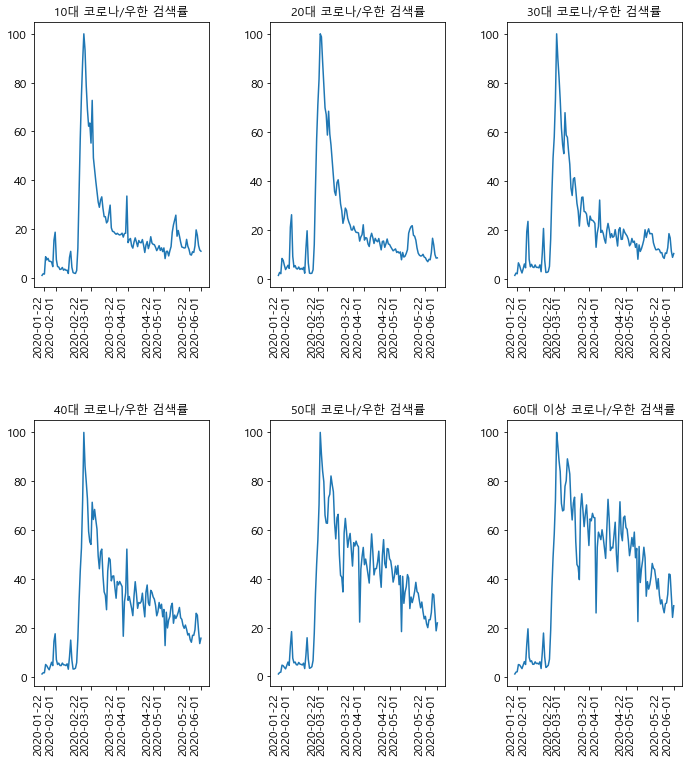

In [63]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 20.

fig, ((ax1, ax2,ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10,10))

ax1.plot(date, results[0], )
ax1.set_title('10대 코로나/우한 검색률')
ax2.plot(date, results[1])
ax2.set_title('20대 코로나/우한 검색률')
ax3.plot(date, results[2])
ax3.set_title('30대 코로나/우한 검색률')
ax4.plot(date, results[3])
ax4.set_title('40대 코로나/우한 검색률')
ax5.plot(date, results[4])
ax5.set_title('50대 코로나/우한 검색률')
ax6.plot(date, results[5])
ax6.set_title('60대 이상 코로나/우한 검색률')

plt.tight_layout()
fig.subplots_adjust(hspace=.5)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha='right')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90, ha='right')
ax5.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha='right')
ax6.set_xticklabels(ax4.get_xticklabels(), rotation=90, ha='right')



plt.show()

In [130]:
time['date']=time['date'].apply(lambda x: convertdate(x))

TypeError: strptime() argument 1 must be str, not Timestamp

In [125]:
confirmed_df= time[['date','confirmed']]
confirmed_diff = confirmed_df.confirmed.diff()

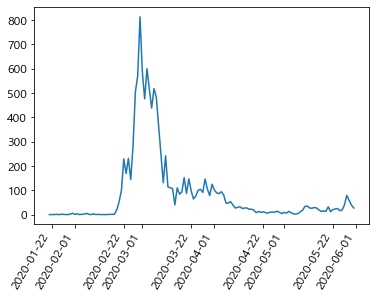

In [129]:
plt.plot(confirmed_df.date, confirmed_diff)

plt.xticks(rotation=60, ha='right')
plt.show()

In [64]:
# for item in df2.index:
#     print(item)

In [65]:
df2.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.00,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.62,126.72
1,1000000001,2.00,2020-01-24,Seoul,Jung-gu,hospital,37.57,127.01
2,1000000002,5.00,2020-01-25,Seoul,Seongbuk-gu,etc,37.59,127.02
3,1000000002,5.00,2020-01-26,Seoul,Seongbuk-gu,store,37.59,127.02
4,1000000002,5.00,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.56,127.03


In [66]:
route = df2.loc[:,['patient_id','latitude','longitude']]

In [67]:
info = df1.loc[:,['patient_id','age']]

In [68]:
df3 = route.merge(info)

In [108]:
import folium
map_osm10 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm20 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm30 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm40 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm50 = folium.Map(location=[37.57, 127.01], zoom_start=5)
map_osm60 = folium.Map(location=[37.57, 127.01], zoom_start=5)

In [109]:
# def has_changed(change):
#     return change['new']

# widget = widgets.IntRangeSlider(
#     value=[10, 60],
#     min=10,
#     max=60,
#     step=10,
#     description='Test:',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d',
# )

# display(widget)

In [110]:
# widget.value[1]

In [111]:
# widget = widgets.IntRangeSlider(
#     value=[10, 60],
#     min=10,
#     max=60,
#     step=10,
#     description='Test:',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     readout_format='d',
# )

# display(widget)
# df3_id = ""

# while(1):
#     for item in df3.index:
#         if df3.loc[item,'age']==widget.value[1]: 
#             if df3_id == "":
#                 point=[]
#                 df3_id=df3.loc[item, 'patient_id']
#                 lat=df3.loc[item,'latitude']
#                 long=df3.loc[item,'longitude']
#                 point.append([lat,long])
#             elif df3_id == df3.loc[item, 'patient_id']:
#                 lat=df3.loc[item,'latitude']
#                 long=df3.loc[item,'longitude']
#                 point.append([lat,long])
#             else:
#                 folium.PolyLine(point).add_to(map_osm)
#                 point=[]
#                 df3_id=df3.loc[item, 'patient_id']
#                 lat=df3.loc[item,'latitude']
#                 long=df3.loc[item,'longitude']
#                 point.append([lat,long])


#     map_osm

In [112]:
df3_id = ""

for item in df3.index:
    if df3.loc[item,'age']==10: 
        if df3_id == "":
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        elif df3_id == df3.loc[item, 'patient_id']:
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm10)
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
            
map_osm10

In [113]:
df3_id = ""

for item in df3.index:
    if df3.loc[item,'age']==20: 
        if df3_id == "":
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        elif df3_id == df3.loc[item, 'patient_id']:
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm20)
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
            
map_osm20

In [114]:
df3_id = ""

for item in df3.index:
    if df3.loc[item,'age']==30: 
        if df3_id == "":
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        elif df3_id == df3.loc[item, 'patient_id']:
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm30)
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
            
map_osm30

In [115]:
df3_id = ""

for item in df3.index:
    if df3.loc[item,'age']==40: 
        if df3_id == "":
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        elif df3_id == df3.loc[item, 'patient_id']:
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm40)
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
            
map_osm40

In [116]:
df3_id = ""

for item in df3.index:
    if df3.loc[item,'age']==50: 
        if df3_id == "":
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        elif df3_id == df3.loc[item, 'patient_id']:
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm50)
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
            
map_osm50

In [117]:
df3_id = ""

for item in df3.index:
    if df3.loc[item,'age']==60: 
        if df3_id == "":
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        elif df3_id == df3.loc[item, 'patient_id']:
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
        else:
            folium.PolyLine(point).add_to(map_osm60)
            point=[]
            df3_id=df3.loc[item, 'patient_id']
            lat=df3.loc[item,'latitude']
            long=df3.loc[item,'longitude']
            point.append([lat,long])
            
map_osm60